In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Step 1: Data Preprocessing
processed_data = df.copy()

# Apply Label Encoding to the 'Genre' column
label_encoder = LabelEncoder()
processed_data['Genre'] = label_encoder.fit_transform(processed_data['Genre'])

In [5]:
processed_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [6]:
# Step 2: Apply Clustering Algorithms
X = processed_data[['Spending Score (1-100)']]

In [7]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
processed_data['KMeans_Cluster'] = kmeans.fit_predict(X)

C:\Users\kawsh\anaconda3\envs\hsr\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kawsh\anaconda3\envs\hsr\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
processed_data['Agglo_Cluster'] = agglo.fit_predict(X)

In [9]:
# Step 3: Evaluate Models
kmeans_silhouette = silhouette_score(X, processed_data['KMeans_Cluster'])
agglo_silhouette = silhouette_score(X, processed_data['Agglo_Cluster'])

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"Agglomerative Clustering Silhouette Score: {agglo_silhouette}")

K-Means Silhouette Score: 0.6540040369722331
Agglomerative Clustering Silhouette Score: 0.6130770378803418


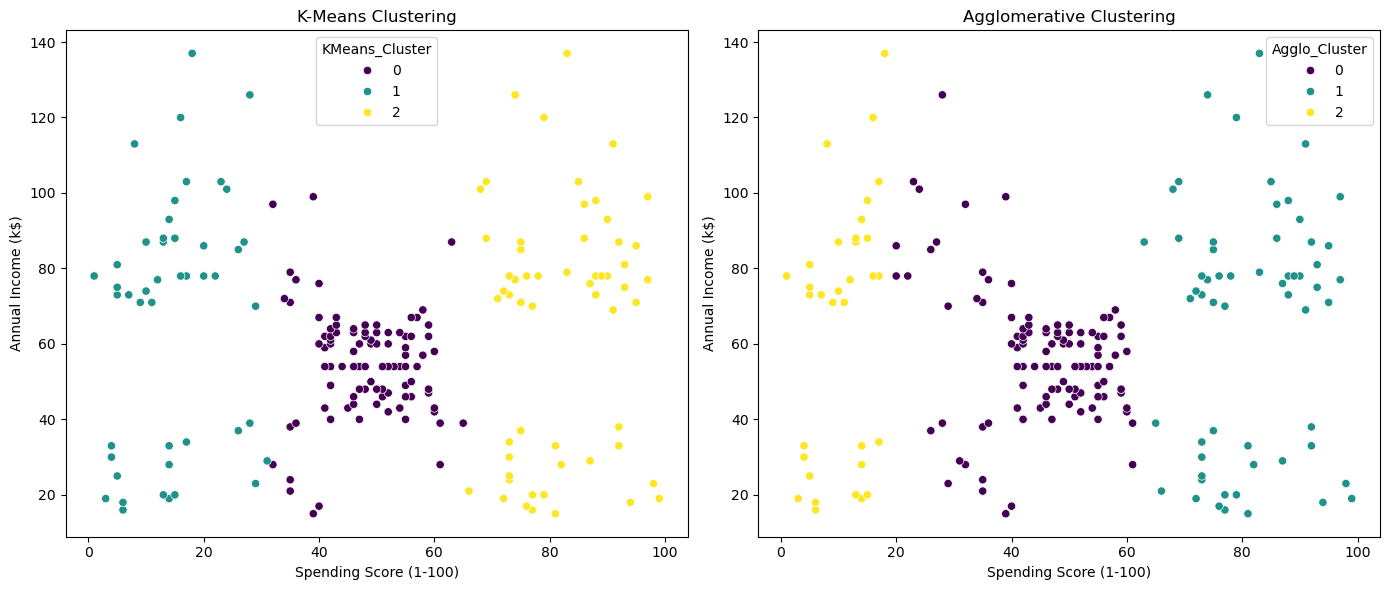

In [10]:
# Step 4: Visualize Clustering Results
plt.figure(figsize=(14, 6))

# K-Means Clustering
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=processed_data['Spending Score (1-100)'],
    y=processed_data['Annual Income (k$)'],
    hue=processed_data['KMeans_Cluster'],
    palette="viridis",
    legend="full"
)
plt.title('K-Means Clustering')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

# Agglomerative Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=processed_data['Spending Score (1-100)'],
    y=processed_data['Annual Income (k$)'],
    hue=processed_data['Agglo_Cluster'],
    palette="viridis",
    legend="full"
)
plt.title('Agglomerative Clustering')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

plt.tight_layout()
plt.show()